#**1. Load Data**

###Import Data

In [ ]:
import pandas as pd

df_train = pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/LogRegSandbox/refs/heads/main/Data/data_titanic_train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,"23,45",NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


###Info Dataset

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(5), object(7)
memory usage: 83.7+ KB


###Drop Kolom yang Kurang Relevan

In [ ]:
df_train = df_train.drop(
    columns=['PassengerId', 'Name', 'Ticket', 'Cabin']
)

In [ ]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,"7,25",S
1,1,1,female,38,1,0,"71,2833",C
2,1,3,female,26,0,0,"7,925",S
3,1,1,female,35,1,0,"53,1",S
4,0,3,male,35,0,0,"8,05",S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13,S
887,1,1,female,19,0,0,30,S
888,0,3,female,NaN,1,2,"23,45",S
889,1,1,male,26,0,0,30,C


#**2. EDA**

###Melihat Missing Value

In [ ]:
missing_count = df_train.isnull().sum()
missing_count

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


###Analisis Univariat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

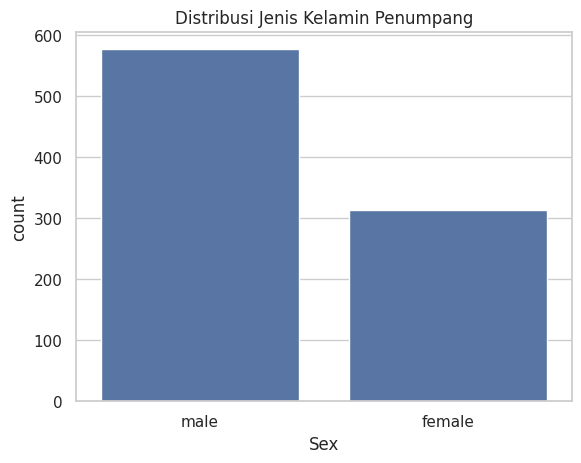

In [ ]:
sns.countplot(x='Sex', data=df_train)
plt.title('Distribusi Jenis Kelamin Penumpang')
plt.show()

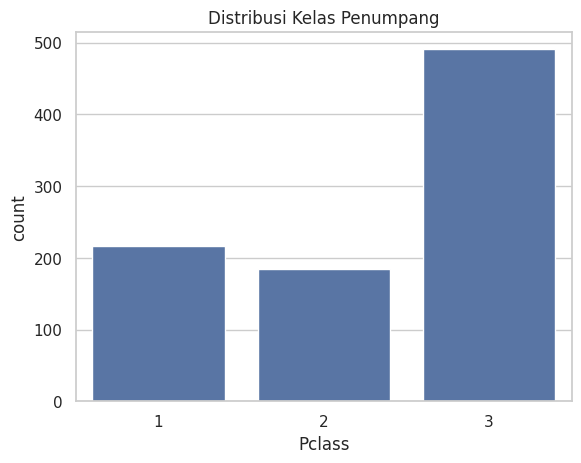

In [ ]:
sns.countplot(x='Pclass', data=df_train)
plt.title('Distribusi Kelas Penumpang')
plt.show()

###Analisis Bivariat

a. Sex vs Survived

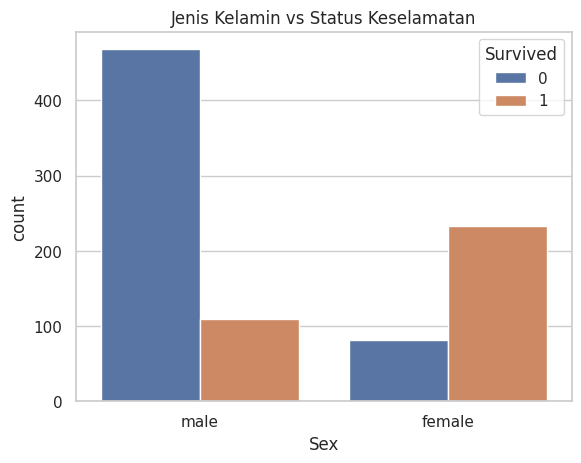

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title('Jenis Kelamin vs Status Keselamatan')
plt.show()

b. Pclass vs Survived

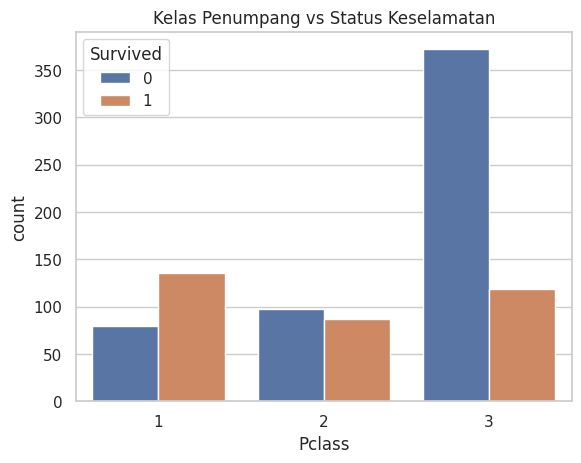

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Kelas Penumpang vs Status Keselamatan')
plt.show()

#**3. Data Cleaning**

###Cek Ulang Missing Value

In [ ]:
df_train.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


###Imputasi Age - Median

In [ ]:
import numpy as np

df_train['Age'] = (
    df_train['Age']
    .astype(str)
    .str.replace(',', '.', regex=False)
)

df_train['Age'] = pd.to_numeric(df_train['Age'], errors='coerce')

In [ ]:
age_median = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(age_median)

In [ ]:
df_train.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


###Imputasi Embarked - Modus

In [ ]:
df_train['Embarked'].value_counts(dropna=False)

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [ ]:
embarked_mode = df_train['Embarked'].mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(embarked_mode)

In [ ]:
df_train['Embarked'].isna().sum()

np.int64(0)

###Fare Object -> float

In [ ]:
df_train['Fare'] = (
    df_train['Fare']
    .astype(str)
    .str.replace(',', '.', regex=False)
)

df_train['Fare'] = pd.to_numeric(df_train['Fare'], errors='coerce')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#**4. Encoding**

In [ ]:
df_train = pd.get_dummies(
    df_train,
    columns=['Sex', 'Embarked'],
    drop_first=True
)

In [ ]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


#**5. Persiapan Model**

###Memisahkan X dan Y

In [ ]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

###Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

#**6. Pemodelan (Logistic Regression)**

###Bangun Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

###Prediksi Data Test

In [ ]:
y_pred = logreg.predict(X_test_scaled)

#**7. Evaluasi Model**

###Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



###Confusion Matrix

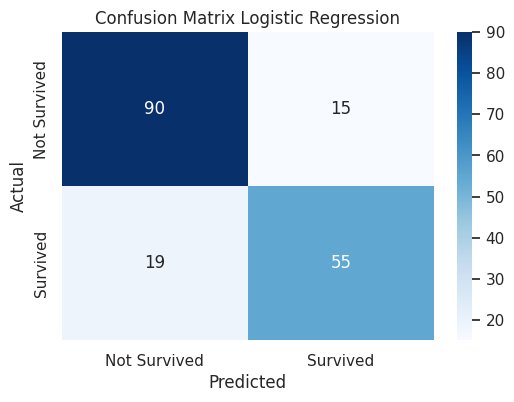

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Survived', 'Survived'],
    yticklabels=['Not Survived', 'Survived']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

###ROC AUC

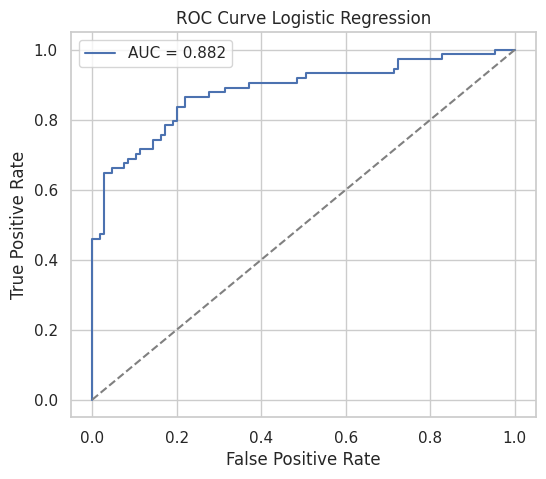

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.show()

###Kekuatan Logistic Regression

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0],
    'Odds_Ratio': np.exp(logreg.coef_[0])
}).sort_values(by='Odds_Ratio', ascending=False)

coef_df

,Feature,Coefficient,Odds_Ratio
4,Fare,0.126511,1.134862
6,Embarked_Q,-0.046058,0.954986
3,Parch,-0.096142,0.908335
7,Embarked_S,-0.189423,0.827436
2,SibSp,-0.349952,0.704722
1,Age,-0.396152,0.672905
0,Pclass,-0.785328,0.455970
5,Sex_male,-1.277104,0.278844


#**8. Prediksi Data Baru**

###Load Data Prediksi

In [ ]:
df_pred = pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/LogRegSandbox/refs/heads/main/Data/data_titanic_predict.csv")
df_pred

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,"34,5",0,0,330911,"7,8292",NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,"9,6875",NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,"8,6625",NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,"12,2875",NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,"8,05",NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,"108,9",C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,"38,5",0,0,SOTON/O.Q. 3101262,"7,25",NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,"8,05",NaN,S


In [ ]:
df_pred.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


###Drop Kolom

In [ ]:
df_pred = df_pred.drop(
    columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'],
    errors = 'ignore'
)

###Data Cleaning

a. Imputasi Age

In [ ]:
df_pred['Age'] = (
    df_pred['Age']
    .astype(str)
    .str.replace(',', '.', regex=False)
)
df_pred['Age'] = pd.to_numeric(df_pred['Age'], errors='coerce')
df_pred['Age'] = df_pred['Age'].fillna(age_median)

b. Imputasi Fare

In [ ]:
df_pred['Fare'] = (
    df_pred['Fare']
    .astype(str)
    .str.replace(',', '.', regex=False)
)

df_pred['Fare'] = pd.to_numeric(df_pred['Fare'], errors='coerce')
df_pred['Fare'] = df_pred['Fare'].fillna(df_train['Fare'].median())

###Cek Missing Value Terbaru

In [ ]:
df_pred.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


#**9. Persiapan Data Sebelum Predict**

###Encoding

In [ ]:
df_pred = pd.get_dummies(
    df_pred,
    columns=['Sex', 'Embarked'],
    drop_first=True
)

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    bool   
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 17.7 KB


#Menyamakan Kolom dengan Data Train

In [ ]:
df_pred = df_pred.reindex(columns = X.columns, fill_value=0)
df_pred

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,True,False,True
414,1,39.0,0,0,108.9000,False,False,False
415,3,38.5,0,0,7.2500,True,False,True
416,3,28.0,0,0,8.0500,True,False,True


###Scalling

In [ ]:
X_pred_scaled = scaler.transform(df_pred)

#**10. Prediksi Data**

###Predict

In [ ]:
df_pred['Survived_pred'] = logreg.predict(X_pred_scaled)
df_pred

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived_pred
0,3,34.5,0,0,7.8292,True,True,False,0
1,3,47.0,1,0,7.0000,False,False,True,0
2,2,62.0,0,0,9.6875,True,True,False,0
3,3,27.0,0,0,8.6625,True,False,True,0
4,3,22.0,1,1,12.2875,False,False,True,1
...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,True,False,True,0
414,1,39.0,0,0,108.9000,False,False,False,1
415,3,38.5,0,0,7.2500,True,False,True,0
416,3,28.0,0,0,8.0500,True,False,True,0


###Distribusi kelas prediksi

In [ ]:
df_pred['Survived_pred'].value_counts(normalize=True)

,proportion
Survived_pred,
0,0.624402
1,0.375598


###Distribusi probabilitas prediksi

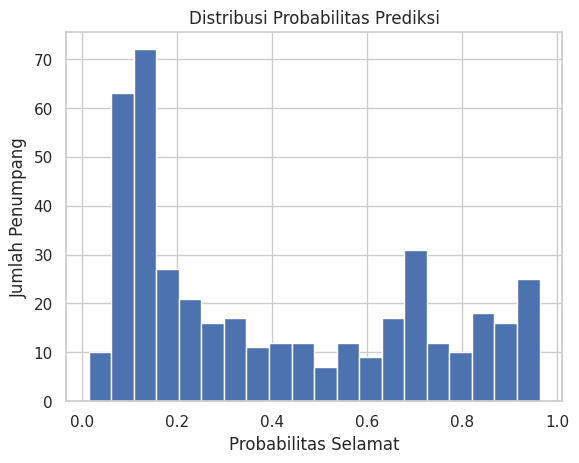

In [ ]:
import matplotlib.pyplot as plt

df_pred['Prob_survived'] = logreg.predict_proba(X_pred_scaled)[:, 1]

plt.hist(df_pred['Prob_survived'], bins=20)
plt.xlabel('Probabilitas Selamat')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Probabilitas Prediksi')
plt.show()

###Visualisasi

a. Sex vs Hasil prediksi

In [ ]:
df_pred.groupby('Sex_male')['Survived_pred'].mean()

,Survived_pred
Sex_male,
False,0.953947
True,0.045113


b. Pclass vs Haisl prediksi

In [ ]:
df_pred.groupby('Pclass')['Survived_pred'].mean()

,Survived_pred
Pclass,
1,0.579439
2,0.322581
3,0.298165


c. Fare vs Probabilitas

In [ ]:
df_pred.groupby(pd.qcut(df_pred['Fare'], 4))['Prob_survived'].mean()

/tmp/ipython-input-1501272627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pred.groupby(pd.qcut(df_pred['Fare'], 4))['Prob_survived'].mean()


,Prob_survived
Fare,
"(-0.001, 7.896]",0.271559
"(7.896, 14.454]",0.308045
"(14.454, 31.472]",0.429251
"(31.472, 512.329]",0.610301


###Output Hasil Prediksi

In [ ]:
df_pred.to_csv('hasil_prediksi.csv', index=False)